# Introduction to Simple Linear Regression


## Learning Objectives and outcomes

- Introduction of linear regression in the simple setting.

- Basic assumptions of the model.

- Terminology - 'intercept', 'coefficient'.

- The Least Square method.
    
- Implement linear regression in sklearn.




In [12]:
# Data analysis packages:
import pandas as pd
import numpy as np

# Visualization packages:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# ignore warnings 
import warnings
warnings.filterwarnings("ignore")

In [2]:
## read data to a dataframe
data = pd.read_csv('data/kc_house_data.csv')[['price','sqft_living']]

## scale price with 1000 so that it will be easier 
data['price'] = data.price/1000
data.head()

,price,sqft_living
0,221.9,1180
1,538.0,2570
2,180.0,770
3,604.0,1960
4,510.0,1680


{'whiskers': [<matplotlib.lines.Line2D at 0x1c29f54780>,
 'caps': [<matplotlib.lines.Line2D at 0x1c29f54e48>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c29f54630>],
 'medians': [<matplotlib.lines.Line2D at 0x1c29f5e518>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c29f5e860>],
 'means': []}

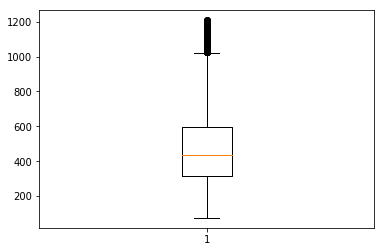

In [92]:
type(data.price)
plt.boxplot(data.price)

Text(0.5, 1.0, 'sqft_living')

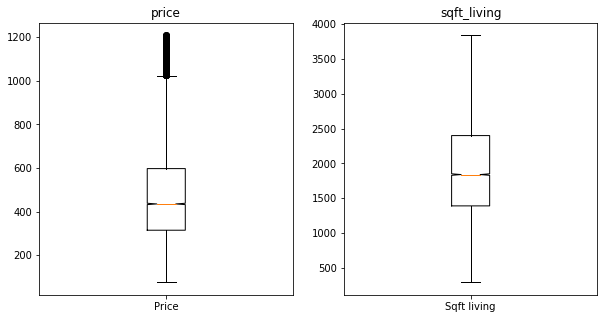

In [77]:
# Check the box plot to see the data is uniform
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10,5), sharey=False)

# price plot
axs[0].boxplot(data.price, labels=['Price'], notch=True)
axs[0].set_title('price')

# sqfr_living plot
axs[1].boxplot(data.sqft_living, labels=['Sqft living'], notch=True)
axs[1].set_title('sqft_living')

In [96]:
data.price.mean()*1.5


710.217331944651

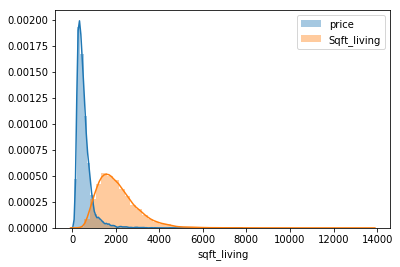

In [22]:
## check distribution plot
sns.distplot(a=data.price, label='price')
sns.distplot(a=data.sqft_living, label='Sqft_living')
plt.legend()

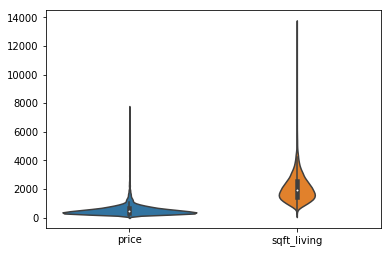

In [23]:
# check violinplot
sns.violinplot(data=data)

In [24]:
## AS you can see there are outliers - let's cut them from our dataset - use 0.98 as the quantile

data.quantile(q=0.98) # this is a cutting point 

price          1600.0
sqft_living    4410.0
Name: 0.98, dtype: float64

In [26]:
# Cut the data set using boolian maxing 
idx = (data<data.quantile(q=0.98)).all(axis=1)
# idx is only printing a true value 
data = data[idx]
data.head()

,price,sqft_living
0,221.9,1180
1,538.0,2570
2,180.0,770
3,604.0,1960
4,510.0,1680


### Assumptions

* Assume $\mbox{price} \approx \mbox{sqft_living}$  linearly.

* There is an initial value (baseline) of the price. 

* Data might not be exactly linear but the errors are random.

### Model  - Single Variable Case

$$ Y = b_{0} + b_{1}X + \epsilon$$
 
- $ b_{0}, b_{1}$ are called the intercept and coefficient of the linear model respectively. 

- $\epsilon$ is the error term.

- Given $\widehat{b_{0}}$ and $\widehat{b_{1}}$ we will make a prediction:

$$ \widehat{y_{i}} = \widehat{b_{0}} + \widehat{b_{1}} x_{i} $$

<img src="best_fit.png" cap="Transformed dataset"  width='300'/>



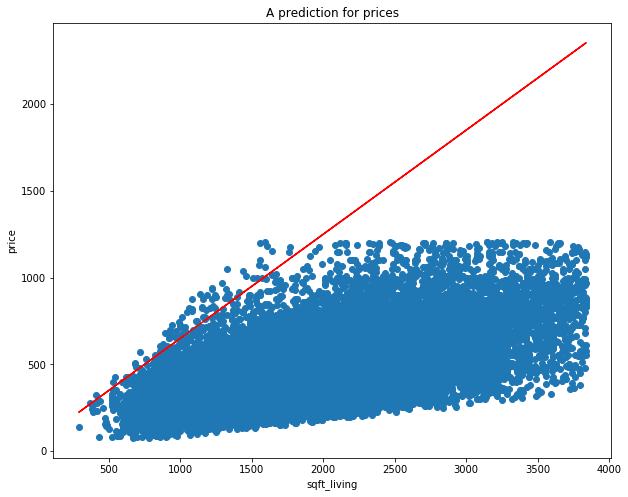

In [40]:
## play with this function what happens when you change b0_hat and b1_hat
X = data.sqft_living.values
y = data.price.values


def pred(b0_hat, b1_hat):
    y_pred = b0_hat + b1_hat * X
    
    data['predicted'] = y_pred
    
    # Data for plotting
    t = data.sqft_living.values
    s = data.predicted.values
    
    plt.figure(figsize= (10,8))

    plt.scatter(x= data.sqft_living, y= data.price)
    plt.plot(t, s, c= 'r')

    plt.xlabel('sqft_living')
    plt.ylabel('price')
    plt.title('A prediction for prices')

    plt.show()
    return 

pred(50, 0.6)


### What do we mean by 'best fitting line'? Least Squares

<a name="least_squares">
</a>

__Q: How to find 'best' line?__


<img src="errors.png" cap="Transformed dataset"  width='500'/>



* Recall that we know actual values $y$ for the prices and for any coefficients $b_{0}, b_{1}$ we can make a prediction $\widehat{y}$. 

* Error for each prediction $e_{i} = y_{i} - \widehat{y_{i}}$



### Residual sum of squares


$$RSS = e_{1}^{2} + e_{2}^{2} + \cdots + e_{n}^{2}$$

* Wait a minute! Why do we get the squares?


The least square method minimizes the RSS.

* Good news: The least square can be calculated exactly because it has a closed form:

$$ \mbox{RSS} = (y_1 - \widehat{b_{0}} -\widehat{b_{1}}x_{1} )^{2} + (y_2 - \widehat{b_{0}} -\widehat{b_{1}}x_{2} )^{2} + \cdots + (y_n - \widehat{b_{0}} -\widehat{b_{1}}x_{n} )^{2}$$

* Bad news: It requires derivatives and is complicated to derive. But no worries, python will take care of this step for us.

$$ b_{1} = \dfrac{\sum^{n}_{i=1} (x_i - \bar{x})(y_{i}-\bar{y})}{\sum^{n}_{i=1} (x_i - \bar{x})^{2}}$$

and 

$$ b_0 = \bar{y} - b_{1}\bar{x} $$


Let's see linear regression in action.


<a name="sklearn">
</a>

## Linear Regression Using sklearn

In [42]:
# import LinearRegression from sklearn
from sklearn.linear_model import LinearRegression

# Initialize the LinearRegression Object
lr = LinearRegression()

In [50]:
# define X and y again here and reshape them
X = data.sqft_living.values.reshape(-1,1)
y = data.price.values.reshape(-1,1)
print('x_value has a shape', X.shape, 'and a data type of', type(X))
print('y_value has a shape', y.shape, 'and a data type of', type(y))

x_value has a shape (20163, 1) and a data type of <class 'numpy.ndarray'>
y_value has a shape (20163, 1) and a data type of <class 'numpy.ndarray'>


In [63]:
# Fit the model
lr.fit(X=X, y=y)

# print intercept and coef attributes of LinerRegression Object
b1 = lr.coef_
b0 = lr.intercept_
print('The coefficnet (Beta_note):', b0)
print('The intercept (Beta_one):', b1)


The coefficnet (Beta_note): [131.59701214]
The intercept (Beta_one): [[0.17692982]]


plot the data

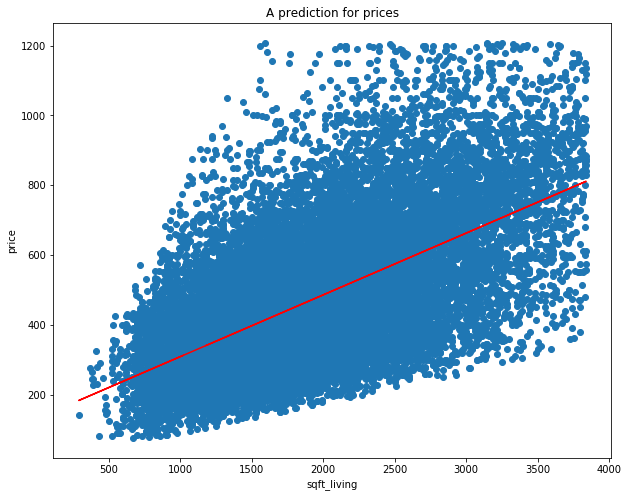

In [64]:
## call pred function to see the 'best fitting line'
pred(b0, b1)

In [ ]:
lr.normalize()

## Further Reading <a name='further_reading'></a>

- https://newonlinecourses.science.psu.edu/stat501/node/252/

- https://towardsdatascience.com/simple-and-multiple-linear-regression-in-python-c928425168f9

- https://www.statsmodels.org/stable/examples/notebooks/generated/ols.html

- https://lagunita.stanford.edu/assets/courseware/v1/e4f2f4823252ead8c1a68722e3415c28/c4x/HumanitiesSciences/StatLearning/asset/linear_regression-handout.pdf

## My addition notes 

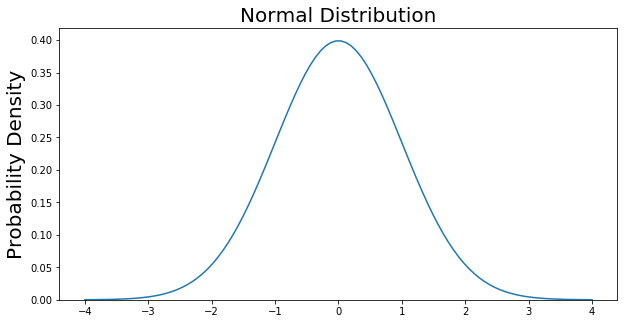

In [65]:
# Import all libraries for this portion of the blog post
from scipy.integrate import quad
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x = np.linspace(-4, 4, num = 100)
constant = 1.0 / np.sqrt(2*np.pi)
pdf_normal_distribution = constant * np.exp((-x**2) / 2.0)
fig, ax = plt.subplots(figsize=(10, 5));
ax.plot(x, pdf_normal_distribution);
ax.set_ylim(0);
ax.set_title('Normal Distribution', size = 20);
ax.set_ylabel('Probability Density', size = 20);

In [79]:
zoe_z = 1.25
mikw_z = 1.00
def normalProbabilityDensity(x):
    constant = 1.0 / np.sqrt(2*np.pi)
    return(constant * np.exp((-x**2) / 2.0) )
zoe_percentile, _ = quad(normalProbabilityDensity, np.NINF, 1.25)
mike_percentile, _ = quad(normalProbabilityDensity, np.NINF, 1.00)
print('Zoe: ', zoe_percentile)
print('Mike: ', mike_percentile)

Zoe:  0.894350226333146
Mike:  0.8413447460685435


## Q-Q plot

In [80]:
import numpy as np
import numpy.random as random
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

data=pd.read_clipboard(header=None).values.flatten()
data.sort()
norm=random.normal(0,2,len(data))
norm.sort()
plt.figure(figsize=(12,8),facecolor='1.0') 

plt.plot(norm,data,"o")

#generate a trend line as in http://widu.tumblr.com/post/43624347354/matplotlib-trendline
z = np.polyfit(norm,data, 1)
p = np.poly1d(z)
plt.plot(norm,p(norm),"k--", linewidth=2)
plt.title("Normal Q-Q plot", size=28)
plt.xlabel("Theoretical quantiles", size=24)
plt.ylabel("Expreimental quantiles", size=24)
plt.tick_params(labelsize=16)
plt.show()

ParserError: Expected 4 fields in line 15, saw 7. Error could possibly be due to quotes being ignored when a multi-char delimiter is used.

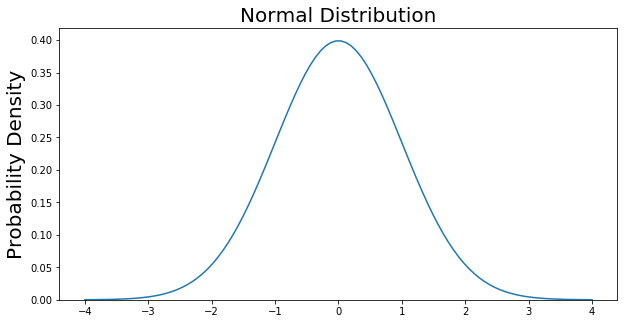

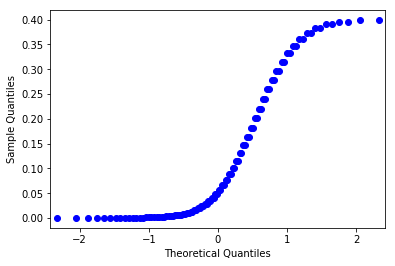

In [89]:
# Import all libraries for this portion of the blog post
from scipy.integrate import quad
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
import pylab

x = np.linspace(-4, 4, num = 100)
constant = 1.0 / np.sqrt(2*np.pi)
pdf_normal_distribution = constant * np.exp((-x**2) / 2.0)
fig, ax = plt.subplots(figsize=(10, 5));
ax.plot(x, pdf_normal_distribution);
ax.set_ylim(0);
ax.set_title('Normal Distribution', size = 20);
ax.set_ylabel('Probability Density', size = 20);

sm.qqplot(pdf_normal_distribution)#, line='45')
pylab.show()

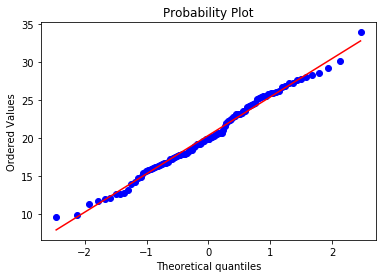

In [86]:
import pylab 
import scipy.stats as stats

measurements = np.random.normal(loc = 20, scale = 5, size=100)   
stats.probplot(measurements, dist="norm", plot=pylab)
pylab.show()